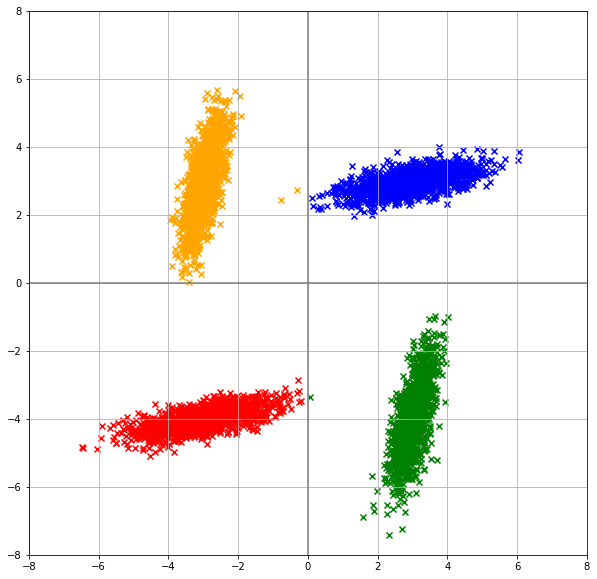

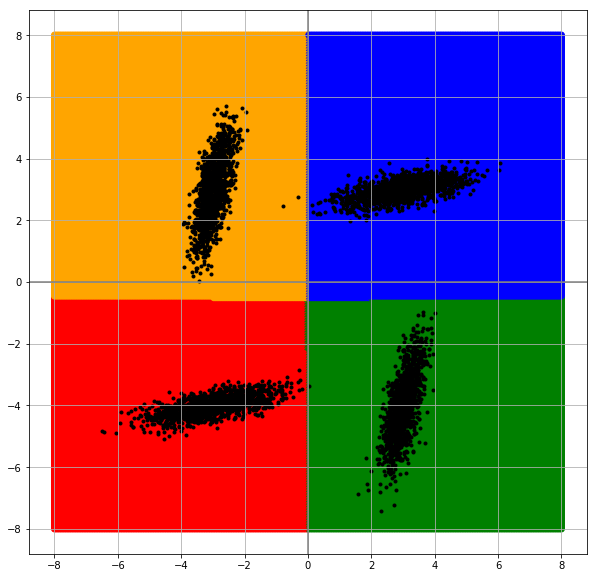

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolors

plt.rcParams['figure.figsize'] = [10, 10]

data = np.genfromtxt('data.txt', delimiter=' ')


#výpočet počtu tříd
from maximin import maximin
x = np.zeros(100)
mm = lambda t: maximin(data)
vfunc = np.vectorize(mm)
x = vfunc(x)
cl_nb = int(np.ceil(np.mean(x)))

# rozdělení dat do tříd
from kmeans import kmeans_direct, iterative_optim, kmeans_binary, plot_kmeans_result
#from tools import plot_result

eps = 1.e-03 #nastavení zastavovací podmínky

# přímé dělení
data_classified = kmeans_binary(data, cl_nb, eps)
data_classified = iterative_optim(data_classified, cl_nb)
plot_kmeans_result(data_classified, 8)

##### min-distance algorithm ####
data_len = len(data)
#print(len(data_classified))
# pro všechny třídy určit střední hodnotu

mi = [] 

for i in range(cl_nb):
    mi.append(np.mean(data_classified[i],axis=0))

# vytvořit meshgrid
grid_dim = 300
X,Y = np.meshgrid(np.linspace(-8,8,grid_dim),np.linspace(-8,8,grid_dim))

# pro každý bod určit 4 hodnoty funkce a vybrat tu nejmenší (označit číslem 0-3, nebo rovnou barvou)

#def f(X,Y):
#    return [X,Y]-mi[0]
    

# Everything above this is setup, the answer to your question lies here:
#fv = np.vectorize(f)
#r = fv(a[:, numpy.newaxis], b)
#r = fv(X[:, np.newaxis], Y)

#print(r)
#print(X)
#print(Y)
z = np.zeros((cl_nb,grid_dim,grid_dim))
for j in range(cl_nb):
    for x in range(0,grid_dim):
        for y in range(0,grid_dim):
            x_mi = [X[x,y],Y[x,y]]-mi[j]
            z[j][x,y]= x_mi[0]**2+x_mi[1]**2
                   
Z = np.argmin(z, axis=0)

cmap = pltcolors.LinearSegmentedColormap.from_list('', ['red','green','blue','orange'])
norm=plt.Normalize(0,3)
plt.scatter(X,Y,c=Z, cmap=cmap, norm=norm)

plt.scatter(data[:,0],data[:,1], color='black', marker='.')

plt.grid(True, which='both')
plt.axhline(y=0, color='gray')
plt.axvline(x=0, color='gray')
plt.show()